In [ ]:
#import lỉbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read data
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

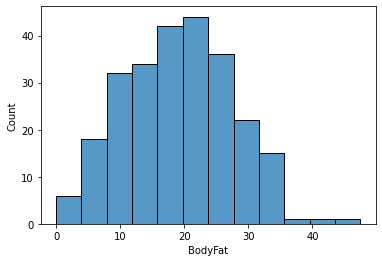

In [ ]:
plt.figure()
sns.histplot(df['BodyFat'])

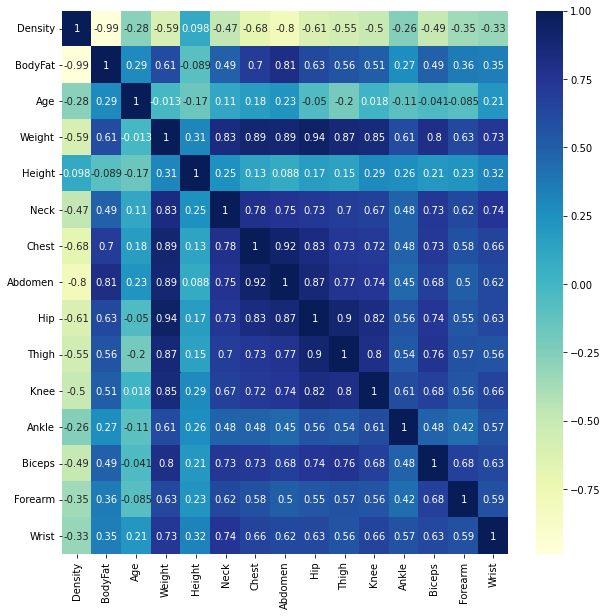

In [ ]:
#Correlation
%matplotlib inline

plt.figure(figsize = (10, 10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
#Feature Engineering
#df['Bmi']=703*df['Weight']/(df['Height']*df['Height'])
#df['ACratio'] = df['Abdomen']/df['Chest']
#df['HTratio'] = df['Hip']/df['Thigh']
#df.drop(['Weight','Height','Abdomen','Chest','Hip','Thigh'],axis=1,inplace=True)
#df.head()

In [ ]:
#Split the features
body_fat_a = df['BodyFat']
df.drop('BodyFat', axis=1, inplace=True)

X = df.drop('Density', axis=1)
Y = df['Density']


In [ ]:
#normalize our features
def normalize(x):
  return (x-np.min(x))/(np.max(x)-np.min(x))

X = X.apply(normalize, axis = 0)
X.head()


,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,0.016949,0.146127,0.792746,0.253731,0.242531,0.200762,0.151515,0.294264,0.267081,0.189189,0.356436,0.460432,0.232143
1,0.000000,0.223789,0.886010,0.368159,0.251318,0.172808,0.218501,0.286783,0.267081,0.290541,0.282178,0.568345,0.428571
2,0.000000,0.145105,0.761658,0.144279,0.289982,0.235070,0.226475,0.309227,0.366460,0.331081,0.198020,0.302158,0.142857
3,0.067797,0.270795,0.886010,0.313433,0.395431,0.216010,0.258373,0.321696,0.267081,0.250000,0.376238,0.604317,0.428571
4,0.033898,0.268751,0.865285,0.164179,0.316344,0.388818,0.269537,0.399002,0.571429,0.331081,0.366337,0.482014,0.339286


In [ ]:
#Split train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=100)
bf_train = body_fat_a[X_train.index]
bf_test = body_fat_a[X_test.index]
print('X train shape: ' + str(X_train.shape))
print('X test shape: ' + str(X_test.shape))
print('Y train shape: ' + str(y_train.shape))
print('Y test shape: ' + str(y_test.shape))

X train shape: (226, 13)
X test shape: (26, 13)
Y train shape: (226,)
Y test shape: (26,)


In [ ]:
#import ML model and elvaluation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error
mae = mean_absolute_error

In [ ]:
def dens_to_fat(density):
  return (495/density)-450

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_test = dens_to_fat(rf.predict(X_test))
y_pred_train = dens_to_fat(rf.predict(X_train))

print('MAE train: ' + str(mae(bf_train, y_pred_train)))
print('R2 score: ' + str(r2_score(bf_train, y_pred_train)))
print('MAE test: ' + str(mae(bf_test, y_pred_test)))

MAE train: 1.497694099167513
R2 score: 0.9501113310175071
MAE test: 3.958371428769423


In [ ]:
#XGBoostttt
xg = xgboost.XGBRegressor()
xg.fit(X_train, y_train)
y_pred_test = dens_to_fat(xg.predict(X_test))
y_pred_train = dens_to_fat(xg.predict(X_train))

print('MAE train: ' + str(mae(bf_train, y_pred_train)))
print('R2 score: ' + str(r2_score(bf_train, y_pred_train)))
print('MAE test: ' + str(mae(bf_test, y_pred_test)))

[04:01:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE train: 1.9609538930707273
R2 score: 0.9083509713376232
MAE test: 4.057760854867789


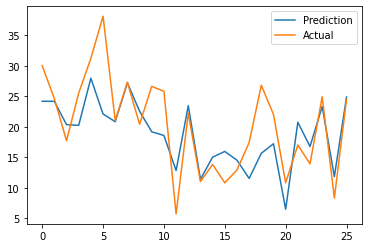

In [ ]:
#Plot our prediction
plt.figure()
bf_test.reset_index(drop=True, inplace=True)
plt.plot(y_pred_test, label='Prediction')
plt.plot(bf_test, label='Actual')
plt.legend()

In [ ]:
#XGBoost is the best out of the three so we will try to further optimize this model by hyper-parameters tuning
params ={
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,3,5,7,9,10, 12, 14, 16],
    'min_samples_leaf' : [1, 3, 5, 7],
    'max_features': ['auto', 'log2'],
    
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
forest = RandomForestRegressor(random_state=1)
grid_search = GridSearchCV(forest, params)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 10, 12, 14, 16],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [ ]:
#This is our best hyper parameters
grid_search.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=300,
                      random_state=1)

In [ ]:
forest_tuned = RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=300,
                      random_state=1)
forest_tuned.fit(X_train, y_train)
y_pred_test = dens_to_fat(forest_tuned.predict(X_test))
y_pred_train = dens_to_fat(forest_tuned.predict(X_train))

print('MAE train: ' + str(mae(bf_train, y_pred_train)))
print('R2 score: ' + str(r2_score(bf_train, y_pred_train)))
print('MAE test: ' + str(mae(bf_test, y_pred_test)))

MAE train: 2.483240346011523
R2 score: 0.8668219444633032
MAE test: 3.8981353760795914


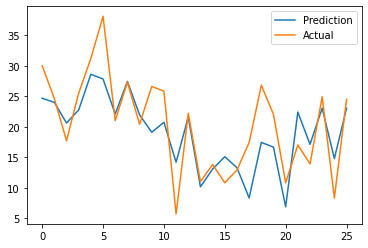

In [ ]:
#Plot our prediction
plt.figure()
bf_test.reset_index(drop=True, inplace=True)
plt.plot(y_pred_test, label='Prediction')
plt.plot(bf_test, label='Actual')
plt.legend()

In [ ]:
#So our best model 
best_model = forest_tuned

In [ ]:
import pickle
pickle.dump(best_model, open('model.pkl', 'wb'))

In [ ]:
import tensorflow as tf
from keras.layers import Dense
from keras import Sequential

In [ ]:
input_shape = [X_train.shape[1]]

nn = Sequential([
    Dense(units = 13, activation='relu', input_shape=input_shape),
    Dense(units = 256, activation='relu'),
    Dense(units = 100, activation='relu'),
    Dense(units = 50, activation = 'relu'),
    Dense(units = 1, activation='relu')
])
nn.compile(optimizer='adam', loss='mae')
nn.fit(X_train, y_train, epochs = 100)


Epoch 1/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8667
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2761
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1876
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1916
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1361
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1135
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0849
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0708
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0657
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0612
Epoch 11/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0663
Epoch 12/100
8/8 [==============================] - 0s 3ms/step - loss: 0.0546
Epoch 13/100
8/8 [==============================] - 0s 3ms/st

In [ ]:
y_pred_test = dens_to_fat(nn.predict(X_test))
y_pred_train = dens_to_fat(nn.predict(X_train))

print('MAE train: ' + str(mae(bf_train, y_pred_train)))
print('R2 score: ' + str(r2_score(bf_train, y_pred_train)))
print('MAE test: ' + str(mae(bf_test, y_pred_test)))

8/8 [==============================] - 0s 2ms/step
MAE train: 4.817188958362141
R2 score: 0.428600372400159
MAE test: 5.366099196213942


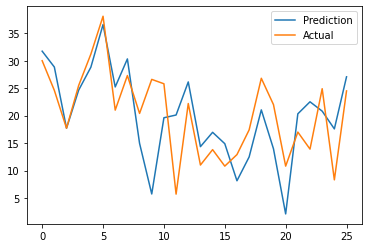

In [ ]:
plt.figure()
bf_test.reset_index(drop=True, inplace=True)
plt.plot(y_pred_test, label='Prediction')
plt.plot(bf_test, label='Actual')
plt.legend()